# Question 1

*Question: What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words?*


The standard deviation is simply how far the average value in a sample dataset is from the sample mean. In a more simplified manner, it describes the spread of a dataset (higher SD = spread out dataset, small SD = tighter dataset)


We can think of the 'standard error of the mean' as a way of measuring the accuracy of the means for a group of sample datasets in regards to the population mean. In a way, a lower SEM implies that the means of the samples is close to the population mean and thus are highly accurate, and a high SEM implies the sample means are more spread out and are likely less accurate.

Both are exteremely similar in the sense that they're used to describe a certain *spread* in a dataset. However, the SD describes the spread of values in an individual sample dataset for the single sample mean, while the SEM describes the accuracy of multiple sample means in regards to the population mean by measuring spread as well.



# Question 2

We can calculate the 95% confidence interval by simply obtaining the critical value (z), the number used to calculate confidence interval ranges (1.96), and multiplying it with the SEM formula output, to obtain the Marginal Error.  

Afterwards, we calculate the upper/lower bound ranges by adding/subtracting Marginal Error from the sample means, and the result of this is that the range of values within the 95% confidence interval are between the lower/upper range outputs ([lower range, higher range])


# Question 3

*Question: Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)?*

To collect the 95% confidence interval for bootstrapped means, we collect the bootstrapped samples and collect the means for each sample, and we form a chart distribution of the bootstrap means. Afterwards, we mathmathetically find the 2.5th percentile (value a) and the 97.5th percentile (value b) of the bootstrap means and use this as our range for the 95% confidence interval (e.g. [a, b])

Any value equal or greater than value a, and any value equal or smaller than value b, is within the 95% confidence interval.

# Question 4

In [1]:
import numpy as np

#the "confidence_level" is the 95% confidence interval, thus all of our values given is by default within the 95% confidence interval range
def bootstrap_confidence_interval(data, num_bootstrap_samples=10000, confidence_level=0.95, statistic=np.mean):
    # Generate bootstrap samples
    bootstrap_samples = np.random.choice(data, (num_bootstrap_samples, len(data)), replace=True)
    
    # Calculate the statistic for each bootstrap sample
    bootstrap_statistics = np.apply_along_axis(statistic, 1, bootstrap_samples)
    
    # Calculate the confidence interval
    lower_percentile = (1 - confidence_level) / 2 * 100
    upper_percentile = (1 + confidence_level) / 2 * 100
    confidence_interval = np.percentile(bootstrap_statistics, [lower_percentile, upper_percentile])
    
    return confidence_interval

# Example usage
data = [5, 7, 8, 9, 10]

# 95% confidence interval for the mean
mean_confidence_interval = bootstrap_confidence_interval(data, statistic=np.mean)
print(f"95% confidence interval for the mean: {mean_confidence_interval}")

# 95% confidence interval for the median
median_confidence_interval = bootstrap_confidence_interval(data, statistic=np.median)
print(f"95% confidence interval for the median: {median_confidence_interval}")


95% confidence interval for the mean: [6.2 9.2]
95% confidence interval for the median: [ 5. 10.]


# Question 5

*Question: The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals?*

A population parameter is a value describing something (like median, for example) about a population (the entirity of something, like the entire population of the United States). We estimate population parameter most times since it is impractical or impossible to obtain the true values for a population parameter.


Sample statistics are certain values (like median) used to describe a sample drawn from the population (a portion of it) to make a good-faith estimate of a population parameter. 


The confidence interval gives a % for a specific range of values in which the population parameter may be true in regards to sample statistics. For example, a 95% confidence interval range implies that in 95 out of 100 universes, the range will correctly align with the population parameter. 

# Question 6

1. The process of bootstrapping might seem complicated but is somewhat basic. Let's say I have 1 sample with 6 values, and I cannot collect any new samples. In bootstrapping, I artificially make a new sample by randomly drawing 6 values from my original sample (even if it repeats the same value) and now have this new sample alongside my old one. 

    You can repeat this bootstrapping process tens, hundreds, or thousands of times until you the amount of samples that you want. Afterwards, you collect the value you want (mean, median, mode, etc) from each sample and then plot and graph it to observe its distribution. You can now do any statistical analysis you want with the amount of samples you have. 
    
   
   .
    
    

2. Bootstrapping is done to pragmatically make sample statistics easier and more convenient. In some experiments, obtaining tens, hundreds, or even thousands of samples for statistics can cost a lot of time, resources, and money that researchers may not have. Thus, bootstrapping allows individuals to still do statistical analysis in circumstances where obtaining samples is difficult

.


3. With my individual sample, I could bootstrap thousands of samples and obtain the mean for each sample. Afterwards, I can graph the means of all my samples to observe the mean distribution. I could use the 95% confidence interval of the range between the 2.5th and 97.5th mean percentiles of the distribution and observe whether my mean hypothesis falls within the range. If it falls within the range, it is very plausible that my hypothesis guess is correct. If my hypothesis guess is outside of the range, it is very likely that my guess is incorrect.  

# Summary of CoPilot Conversation Up To This Point

Sure! Here's a brief summary of our conversation:

1. **Standard Error of the Mean (SEM) vs. Standard Deviation (SD)**:
   - **SD** measures the variability of individual data points within a dataset.
   - **SEM** measures the precision of the sample mean as an estimate of the population mean and decreases with increasing sample size.

2. **Bootstrapping**:
   - **Process**: Involves resampling with replacement from the original data to create many bootstrapped samples, calculating the statistic of interest for each sample, and forming a distribution of these statistics.
   - **Purpose**: Used to estimate the distribution of a statistic, construct confidence intervals, and perform hypothesis testing without relying on assumptions about the data's distribution.

3. **Creating Confidence Intervals**:
   - **Using SEM**: Calculate the sample mean, SEM, and use the critical value (e.g., 1.96 for 95% confidence) to construct the interval.
   - **Using Bootstrapping**: Generate bootstrapped samples, calculate the statistic for each, and determine the percentiles (e.g., 2.5th and 97.5th) to form the confidence interval.

4. **Assessing Hypothesized Mean**:
   - **Bootstrapping Approach**: Generate bootstrapped samples, calculate the mean for each, form a distribution, and check if the hypothesized mean falls within the 95% confidence interval of the bootstrapped means.

5. **Python Code**:
   - Provided code to generate 95% bootstrapped confidence intervals for both the mean and median of a sample.

This summary should cover the key points we discussed. If you need any more details or clarifications, feel free to ask!

# Question 8

The company AliTech has created a vaccine intending to improve the health of people who use the vaccine. We are analyzing whether the health of the patients (measured as initial health score) improve after taking the vaccine (measured as final health score).

The metric being used to measure the vaccine efficiency is the final health score subtracted by the initial health score. This is because the subtraction between the two values indicates change in health before/after taking the vaccine. We will bootstrap 5,000 samples and obtain the mean of the final/initial health difference for each sample and then proceed to display the distribution. The average mean for all the samples will be collected alongside the 95% confidence interval range.


For context, a value of 0 indicates that there was no change in health with taking the vaccine. A value below 0 concludes that the vaccine possibly had negative side effects. A value above 0 possibly concludes that the vaccine had positive side effects after being taken.


A null hypothesis, or "no effect", in the context of this analysis would be if the Final Health Score subtracted by the Initial Health Score is equal or below the value of 0 on average. 

### Quantitative Analysis:

In [11]:
import numpy as np
import pandas as pd

# Your data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Number of bootstrap samples
n_bootstraps = 5000

# Array to store the means of the differences
bootstrap_means = np.zeros(n_bootstraps)

# Perform bootstrap sampling
for i in range(n_bootstraps):
    sample = df.sample(n=len(df), replace=True)
    mean_diff = (sample['FinalHealthScore'] - sample['InitialHealthScore']).mean()
    bootstrap_means[i] = mean_diff

# Calculate the overall mean of the bootstrap means
overall_mean = bootstrap_means.mean()

# Calculate the 95% confidence interval
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"Mean of the differences (Final - Initial) over {n_bootstraps} bootstrap samples: {overall_mean}")
print(f"95% confidence interval: {confidence_interval}")


Mean of the differences (Final - Initial) over 5000 bootstrap samples: 3.29282
95% confidence interval: [0.8 5.6]


 ### Data Visualizations 

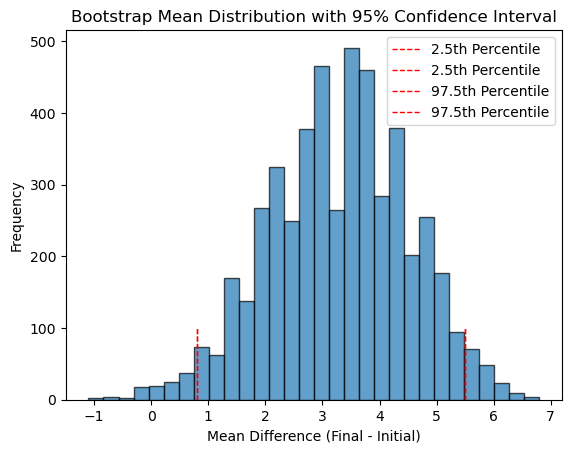

Mean of the differences (Final - Initial) over 5000 bootstrap samples: 3.2916799999999995
95% confidence interval: [0.8 5.5]


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Your data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Number of bootstrap samples
n_bootstraps = 5000

# Array to store the means of the differences
bootstrap_means = np.zeros(n_bootstraps)

# Perform bootstrap sampling
for i in range(n_bootstraps):
    sample = df.sample(n=len(df), replace=True)
    mean_diff = (sample['FinalHealthScore'] - sample['InitialHealthScore']).mean()
    bootstrap_means[i] = mean_diff

# Calculate the overall mean of the bootstrap means
overall_mean = bootstrap_means.mean()

# Calculate the 95% confidence interval
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Plot the distribution of bootstrap means
plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7)
plt.plot([confidence_interval, confidence_interval], [0, 100], 'r--', linewidth=1, label='2.5th Percentile')
plt.plot([confidence_interval, confidence_interval], [0, 100], 'r--', linewidth=1, label='97.5th Percentile')
plt.title('Bootstrap Mean Distribution with 95% Confidence Interval')
plt.xlabel('Mean Difference (Final - Initial)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Mean of the differences (Final - Initial) over {n_bootstraps} bootstrap samples: {overall_mean}")
print(f"95% confidence interval: {confidence_interval}")


# Analysis, Findings and Future Discussion

The metric used to measure the vaccine efficiency was the final health score subtracted by the initial health score. This is because the subtraction between the two values indicates change in health before/after taking the vaccine. 

A value of 0 indicates that there was no change in health with taking the vaccine. A value below 0 concludes that the vaccine possibly had negative side effects. A value above 0 possibly concludes that the vaccine had positive side effects when taken.

We can observe with the Quantitative Code Output & the Data Visuals that the vaccine likely had a positive effect on the health of the individuals who took it, for a variety of reasons.


The mean of the final/initial health difference for the 5,000 samples was 3.29, a value significantly higher than a "no effect" or "negative effect" of a value equal or below 0. This is the first indicator displaying that the vaccine had a positive effect on people's health. Furthermore, the key piece of evidence is within the confidence intervals regarding the data. The 95% confidence interval of the values (also demonstrated visually) is between 0.8 and 5.5, thus, for every 100 people who take the vaccine, 95 of them are likely going to have a score between 0.8 and 5.5, effectively meaning that the vaccine has a very probable chance at improving the health of an individual if they decide to take the vaccine.

.

However, some considerations should be taken if further analysis should continue regarding the vaccine, such as outside activity done before/after taking the vaccine. Certain activities, outside of the vaccine, can negatively or positively effect one's health, and this can interfere with the results of the samples. This should be taken into account when we want to determine whether the change in health is entirely because of the vaccine.

# Question 9

Somewhat. 